# Udacity Project Review

이번 노트북은 2018년 Udacity Machine Learning nanoderee  과정중에 supervisor learning의 과제 프로젝트를 다시 리뷰한것입니다. 
https://github.com/shim0471/Machine_Learning_Engineer_Nanodegree/blob/master/02_Finding_donors/finding_donors.ipynb

## Project: Finding Donors for Charity

이 프로젝트는 1994년 USA Census에서 수집한 데이터를 기반으로 몇몇 supervisor learning 알고리즘을 이용하여 개인별 수입을 예측하는 것을 목표로 가장 정확하게 예측할 수 있는 모델 후보들 중에 알고리즘을 최적화를 시켜 베스트 모델을 선택합니다. 예측하고자 하는 종속변수는 수입이 $50,000 이상인 사람들을 구별하는 것입니다. 구별된 이러한 사람들은 비영리 기업의 기부 마케팅에 활용됩니다. 

정확하게 구별된 이러한 사람들에게 비영리 기업은 마케팅 활동을 실시하고, 무수히 많은 사람들에게 변별력 없이 회사의 자원을 낭비하는 것을 예방하여, 결국은 기부를 할 가능성이 많은 사람들의 비율를 높이고자 합니다.

## < Index >

### 1. EDA

### 2. Preparing the Data

### 3. Evaluating Model Performance

### 4. Spot Check ML Algorithms

### 5. Choice the Best Model

### 6. Improve Model Performance

### 7. Feature Selection

Supervisor learning은 Likelihood model 이라고도 하며, 주로 예측분석을 하고자 할때 이용되는 학습법입니다. 마케팅에서 감독학습은 고객의 과거 데이터를 통해 학습을 하고 미래의 고객 행위를 예측한다고 할 수 있습니다. 예를 들어 고객이 제품을 구매할 가능성 또는 예상 고객이 웹사이트에서 어떠한 행동을 할 것인가를 예측하고자 할때 이용됩니다. 

이러한 예측분석을 이용하기 전에는 기존 마케팅은 RFM 모델로 고객의 행위를 알고자 하였습니다. RFM은 Recency (시기), Frequency(빈도), Monetary Value(금액)의 약어로 구매 가능성이 높은 사람을 파악하는 방법입니다. 하지만 이 방법은 효용이 제한적이며 현실 생활에 적용하기가 생각보다 어려운 경향이 있었으며, 통계적 예측 기반이 없는 경험적 접근방식이라고 할 수 있습니다. 

감독학습을 이용한 예측분석은 RFM 같은 기존 업계에서 이용하던 RFM 같은 모델이 할 수 없는 고객의 평생가치, 멤버십 및 이메일 수신, 서비스의 해지 가능성, 웹사이트 방문자가 구매자로 전활할 가능성을 예측할 수 있으며, 이는 회사의 이익율을 극대화 할 수 있습니다. 또한 이러한 새로운 기술을 이용한 마케팅은 프로모션 비용을 절감할 수 있습니다.

기부자를 판별하는 이번 프로젝트는 연 $50,000 을 넘는 사람을 구별하는 classfication 문제입니다. classification 문제는 스팸메일 분류, 고객 이탈자 분류, 고양이와 강아지를 분류같이 알고자 하는 값이 이산적 Discrete 입니다. 또한 이 프록젝트는 정답인 라벨을 알고 있으므로 감독학습이 적합하며, 알고리즘은:

* SVM

* Naive Bayes

* Decision Tree
* K-NN
* Random Forest 
* Gradient Boosting

등이 있습니다.

## 1. EDA

In [1]:
%ls

Sales-Win-Loss.csv           review_finding_donors.ipynb
census.csv*                  scikit_learn.ipynb
ml_map.png


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

from time import time

import warnings

In [2]:
df=pd.read_csv('census.csv')
df.shape

(45222, 14)

In [62]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
# 총 데이터의 양 (row)
n_records = len(df)

#  연 수입이 $50,000를 넘는 사람들의 데이터
n_greater_50k = len(df[df['income'] == '>50K'])

# 연 수입이 $50,000를 안되는 사람들의 데이터
n_less_50k = len(df[df['income'] == '<=50K'])

# 연 $50,000를 넘는 사람들의 비율
greater_per = (n_greater_50k / n_records) * 100

print("총 데이터의 양: {}". format(n_records))
print("연 $50,000 이상 사람들의 데이터: {}".format(n_greater_50k))
print("연 $50,000 이하 사람들의 데이터: {}".format(n_less_50k))
print("연 $50,000 이상 사람들의 비율: {:.3}%".format(greater_per))

총 데이터의 양: 45222
연 $50,000 이상 사람들의 데이터: 11208
연 $50,000 이하 사람들의 데이터: 34014
연 $50,000 이상 사람들의 비율: 24.8%


### Feature Exploration

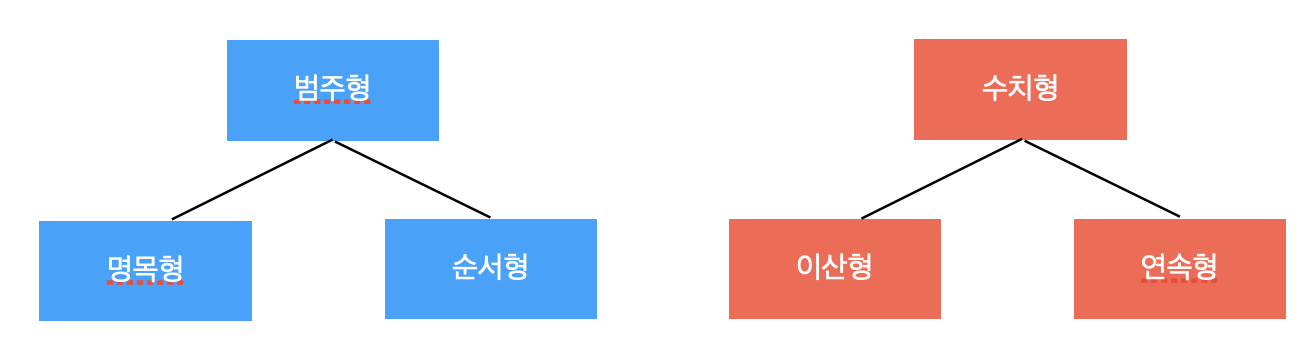

In [5]:
Image(filename='type.png', width=700)

* age: 수치를  나타내는 연속형 continous 자료로 나이를 말합니다.


* workclass: 범주형 category 자료로 분류를 목적으로 하는 명목형 자료이다. 자영업, 주 정부 공무원, 지방 공무원, 실업자등을 구별합니다.


* education_level: 범주형 자료로 교육 수준을 나타냅니다.


* education-num: continous 자료로 교육의 수준을 수치화 시켰습니다. 1 ~ 16의 범위를 가지며, 박사학위 처럼 숫자가 높을수록 교육 수준을 높음을 의미합니다.


* maritial-status: 결혼 상태를 나타내는 명목형 자료입니다. (Divorced  : 이혼,
Married-AF-spouse : 기혼 - 배우자가 군복무중으로  떨어져 생활하고 있는 경우,
Married-civ-spouse : 기혼 - 배우자가 민간인인 경우,
Married-spouse-absent : 기혼 - 배우자가 직업상의 이유로 떨어져 사는 경우,
Never-married : 미혼,
Separated : 별거,
Widowed : 사별)


* occupation: 직업을 의미하는 명목형 자료로 14개의 category로 구분이 됩니다.


* relationship: 명목형 자료로 가족 구성내에서 위치를 나타냅니다. (남편, 아내, 가족인 경우와 결혼 유무를 나타냅니다.)


* race: 인종을 나타내는 명목형 자료로 흑인, 백인, 아시안 패스닉, 인디안-에스키모, 다른 인종 등으로 구별됩니다.


* sex: 남녀 성별을 나타냅니다.


* capital-gain: 소득을 수치화 시켜놓은 연속형 자료입니다. 


* capital-loss: 자본 손실을 나타내는 연속형 자료입니다.


* hours-per-week: 주당 근무시간을 나타내는 연속형 자료입니다.


* native-country: 출생국을 나타내는 명목형 자료입니다. 41개 나라로 구분이 됩니다.

총 14개의 Feature 중에서 Label을 제외한 연속형 자료가 5개 있으며, 명목형 자료가 8개 입니다.

### < Summarize Continous Data >

### age

In [6]:
df['age'].describe()

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

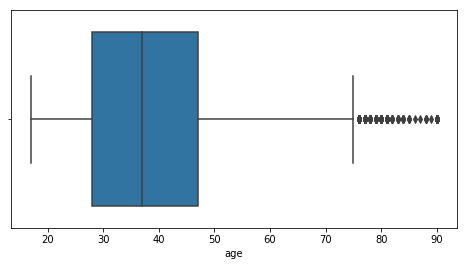

In [7]:
plt.figure(figsize=(8,4))
sns.boxplot(df['age'])
plt.show()

나이의 분포는 평균 38세를 기준으로 28세부터 47세 까지 대부분이 분포되어 있으며 가장 많은 나이는 90세 이며, 가장 어린 나이는 17세입니다. 나이 Feature의 기술통계를 살펴보면 표준편차가 13.2으로 데이터의 분포가 평균 38세에서 널리 분포가 되어있다는 것을 알 수 있습니다.

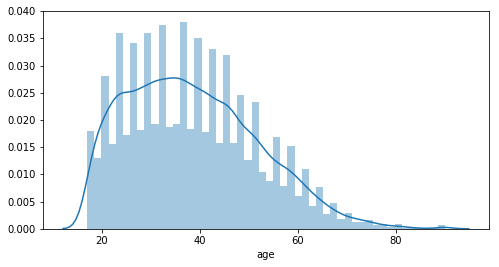

In [8]:
plt.figure(figsize=(8,4))
sns.distplot(df['age'], hist=True)
plt.show()

### hours-per-week

In [9]:
df['hours-per-week'].describe()

count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

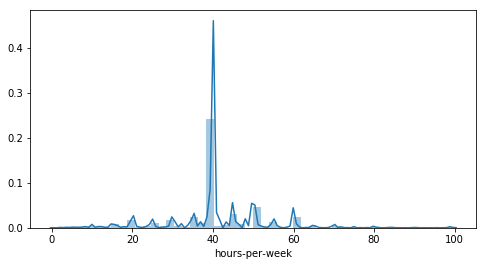

In [10]:
plt.figure(figsize=(8,4))
sns.distplot(df['hours-per-week'])
plt.show()

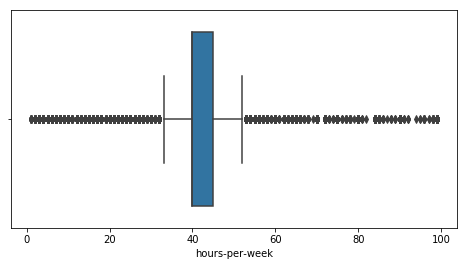

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(df['hours-per-week'])
plt.show()

주당 근무시간을 살펴보면 평균 40시간에 대부분의 데이터들이 분포되어있다는 것을 알 수 있습니다.

## 2. Preparing the Data

데이터를 머신러닝 알고리즘에 대입하기 전에 Pre-processing 단계를 거쳐야 합니다. Pre-processing 작업은 데이터를 정제하고, 적절하게 포맷팅하고 다시 구성하는 것을 말하며 Data Cleaning 이라고도 합니다. 다행히도 지금 다루고 있는 데이터세트는 이미 이러한 과정을 거쳐 비어있는 값이나 불필요한 값들은 없는 상태입니다. 하지만 몇몇 feature 같은 경우에는 조정을 하여야 합니다. 

이러한 Data Cleaning 작업은 데이터 분석에서 아주 중요한 위치를 차지하고 있으며, 예측분석과 같은 경우에는 정확한 예측에 많은 영향을 끼치기도 합니다. 

### 2-1. Transform Skewed Continuous Features

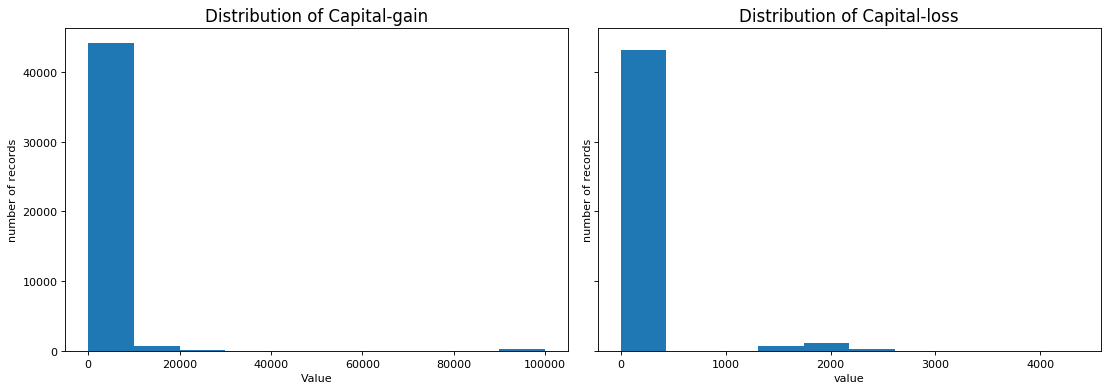

In [12]:
fit, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5), sharey=True, dpi=80)
ax1.hist(df['capital-gain']) 
ax2.hist(df['capital-loss'])
ax1.set_title("Distribution of Capital-gain", fontsize=15)
ax2.set_title("Distribution of Capital-loss", fontsize=15)
ax1.set_xlabel('Value')
ax2.set_xlabel('value')
ax1.set_ylabel('number of records')
ax2.set_ylabel('number of records')

plt.tight_layout()
plt.show()

연속형 자료인 Capital-gain 과 Capital-loss 의 데이터 분포를 보면 매우 한쪽으로 치우쳐있는 skewed 형태인것을 알 수 있습니다. 그리고 분포가 왼쪽에서 오른쪽으로 심한 경사각을 이루며 분포되는 것으로 데이터의 값이 0보다 큰 양수란 것 또한 알 수 있습니다.  이처럼 매우 한쪽으로 치우친 분포는 ML 알고리즘에 민감하게 반응하여 왜곡을 일으키며 성능에 좋지 않은 영향을 미칩니다. 

일반적으로 머신러닝 알고리즘은 데이터의 분포가 가우시안 분포라고 가정을 합니다. 이 가정은 평균이 0이고 표준편차가 1인 상태를 말하며, 이러한 분포는 데이터 분석뿐만 아니라 과학을 연구한는 이들도 이러한 가정을 합니다. 가우시안 분포는 자연 현상들을 가장 잘 설명하며, 통계분석을 보다 쉽게 하도록 도와줍니다. 그렇지만 그래프로 표현된 두 Feature는 매우 심한 skewed 형태이며, logarithmic trasfomation 같은 방법을 이용하여 큰 값은 작게, 아주 작은 값은 좀 더 크게 만들어, Outlier에 끼치는 영향을 줄여줌으로써 편향된 결과를 도출하는 것을 방지할 수 있습니다.

Logarithm 변환은 상대적으로 작은 값에 몰려잇는 데이터의 모양을 퍼트리게 하여 좌우대칭 분포의 모양이 되도록 합니다. 이처럼 가우시안 분포가 아닌 경우에 사용되는 방법은 logarithm 변환 이외에도 아래와 같은 방법들이 있습니다. 

* Square roots


* Reciprocal times


* Box-cox transformation 

In [13]:
# 데이터셋에서 Label feature를 분리
label = df['income']
new_df = df.drop('income', axis=1)

# 로그 변환

skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data= new_df)
features_log_transformed[skewed] = new_df[skewed].apply(lambda x: np.log(x+1))

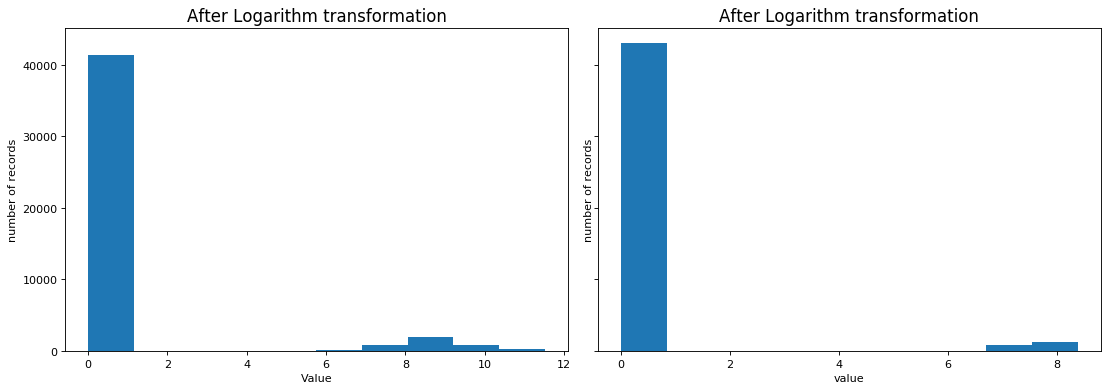

In [14]:
fit, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5), sharey=True, dpi=80)
ax1.hist(features_log_transformed['capital-gain']) 
ax2.hist(features_log_transformed['capital-loss'])
ax1.set_title("After Logarithm transformation", fontsize=15)
ax2.set_title("After Logarithm transformation", fontsize=15)
ax1.set_xlabel('Value')
ax2.set_xlabel('value')
ax1.set_ylabel('number of records')
ax2.set_ylabel('number of records')

plt.tight_layout()
plt.show()

### 2-2. Normalizing Numerical Features

작은 값을 로그 변환한 Capital-gain, Capital-loss 데이터와 나머지 연속형 feature인 age, education-num, hours-per-week 데이터들은 머신러닝 알고리즘 학습에 맞도록 또 다른 변환을 해주어야 합니다. 현재 이들 값은 숫자로 알고리즘에 넣기 불가능한 것은 아니지만, 서로 다른 크기를 가지고 있으므로, 더 세부적인 조정을 통하여 머신러닝의 정확도를 높일 수 있습니다. 

Rescale Data는 이처럼 서로 다른 크기나 단위를 가지는 feature들을 같은 크기를 가지도록 하며, 이러한 Rescale 작업을 Feature Scaling 이라고 하며, Standardzation 과  Normalization 으로 구분이 됩니다.

* Standardzation: 데이터들의 값을 평균이 0이고 표준편차가 1인 상태로 만듦


* Normalization: 연속형 데이터들의 값을 0 ~ 1의 범위로 만듦

Scikit-learn 에서는 Rescale 작업을 해주는 MinMaxScaler() 와 MinAbsScaler() 함수들이 라이브러리로 제공이 됩니다.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # 기본값 = 0, 1
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_minmax_transform[numerical])

display(features_log_minmax_transform.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### 2-3. After Normalizing

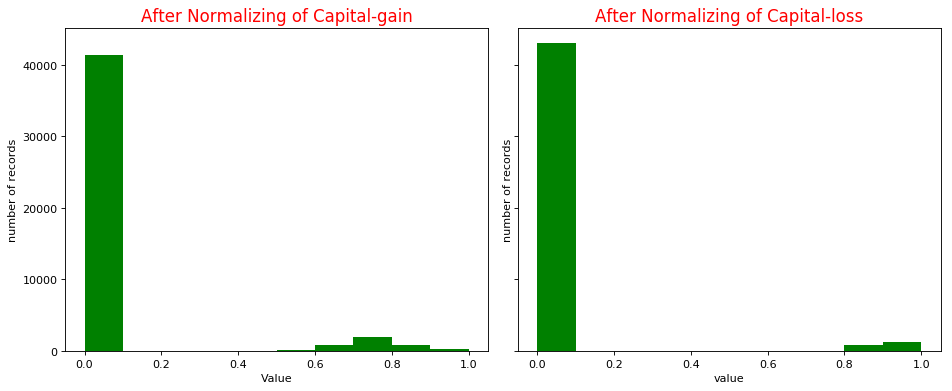

In [16]:
fit, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), sharey=True, dpi=80)
ax1.hist(features_log_minmax_transform['capital-gain'], color='green') 
ax2.hist(features_log_minmax_transform['capital-loss'], color='green')
ax1.set_title("After Normalizing of Capital-gain", fontsize=15, color='red')
ax2.set_title("After Normalizing of Capital-loss", fontsize=15, color='red')
ax1.set_xlabel('Value')
ax2.set_xlabel('value')
ax1.set_ylabel('number of records')
ax2.set_ylabel('number of records')

plt.tight_layout()
plt.show()

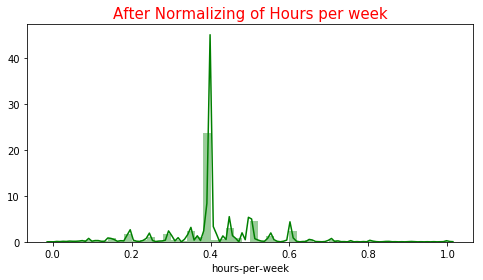

In [17]:
plt.figure(figsize=(8,4))
sns.distplot(features_log_minmax_transform['hours-per-week'], color='green')
plt.title('After Normalizing of Hours per week', fontsize=15, color='red')
plt.show()

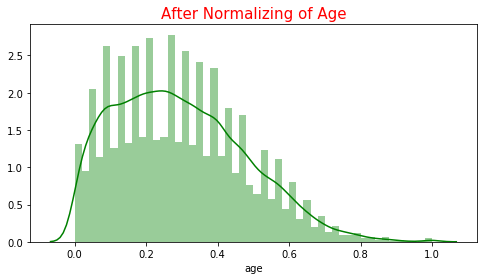

In [18]:
plt.figure(figsize=(8,4))
sns.distplot(features_log_minmax_transform['age'], hist=True, color='green')
plt.title('After Normalizing of Age', fontsize=15, color='red')
plt.show()

데이터를 Normalizing 이후에 Feature 값들이 0 ~ 1 사이로 변환된 것을 확인 할 수 있습니다.

### 2-4. Label Encoding

데이터들을 살펴보면 Category 형태의 자료들을 확인할 수 있습니다. 문자로 구분이 되어있는 이러한 데이터들을 알고리즘으로 연산이 가능하도록 숫자로 변화시켜 주어야 합니다. 서로 독립적으로 연관이 없는 데이터들은 0 또는 1처럼 변환시켜 알고리즘에 맞도록 dummy 변수들을 만들어야 합니다.

Category 데이터를 숫자형으로 변화시켜 주는 방법으로 Label encoding 과 One-hot encoding 방법들이 있습니다. Pandas에서는 get_dummies() 함수를 이용하여 feature를 dummy 변환시킬 수 있으며, Scikit-learn 에서는 One-hot-encoding 을 제공합니다.

* 언제 Label Encoding을 사용하는가?

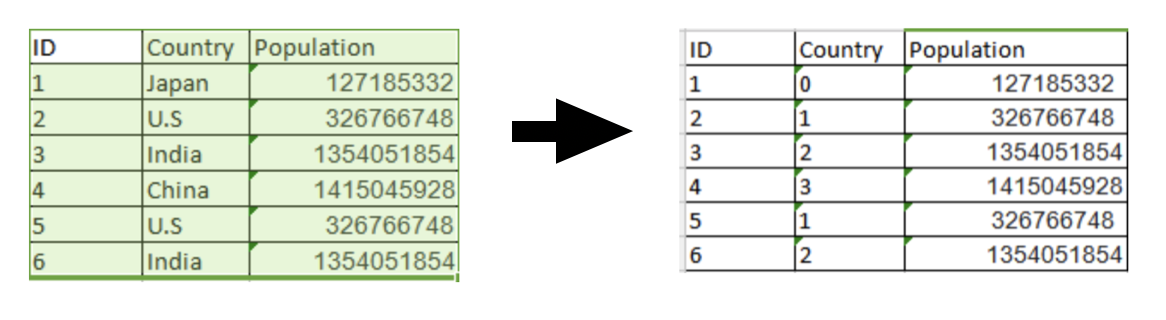

In [19]:
Image(filename='label.png', width=700)

위의 그림에서 Country의 데이터 값을 Sklearn의  LabelEncoder을 이용하여 0 부터 데이터 값의 종류 -1 범위의 값으로 변환을 시켰습니다. 숫자로 변환시키는 Label Encoding은 문제점이 하나 있습니다. Country의 값들은 Category의 명목형 변수로 서로 연관이 없습니다. 하지만 변환된 값들은 row 마다 관련이 생기게 됩니다.
예를 들면, 2번 ID는 3번 ID의 Country 값이 연관이 없으면서도, 더 작은 값으로 여기게 됩니다. ( 0 < 1 <  2 )

결론적으로 알고리즘 모델이 Country의 크기가 커짐으로써 Population의 크기를 키우게 될것이라는 의도치않은 연관성이 생기게 됩니다. 이러한 문제점을 극복하기 위해서는 One-hot Encoding을 사용해야 합니다.

* 언제 One-hot Encoding을 사용하는가?

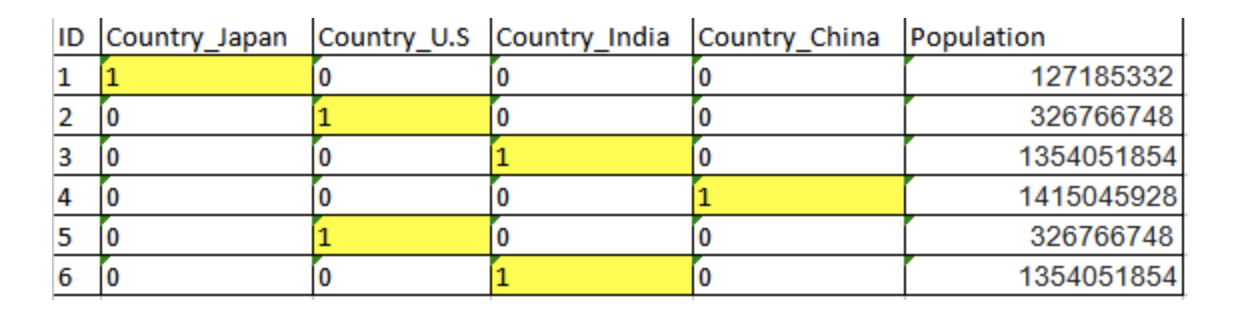

In [20]:
Image(filename='onehot.png', width=600)

One-hot Encoding은 언급하였듯이 Feature의 값을 알고리즘 모델이 오해하지 않도록 Label Encoding이 변환시킨 숫자의 값을 Category 자료형으로 인식하고 여러개의 column으로 분리를 시켜 줍니다. 그리고 Label Encoding으로 변환된 값은 위의 그림처럼 0 또는 1로 교체됩니다.

하지만 One-hot Encoding 또한 문제점을 가지고 있는데 하나의 feature를 다수의 feature들로 변환시키면서 데이터세트의 차원을 아주 높인다는 것입니다. 이처럼 차원이 복잡해지면서 알고리즘 학습 속도는 느려지고, 정확성도 낮아지게 됩니다. 이런 문제점을 해결하기 위하여 많은 방법이 이용되며 대표적으로 Feature selection, Factor based reductin, Projection based 방법들이 있습니다.


(참고: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/ )

In [21]:
# One-hot encoding the data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the label to numerical values
income = label.apply(lambda x:0 if x=='<=50K' else 1)

# Print the number of feature after one-hot encoding
encoded = list(features_final.columns)
print('{} total features after one-hot encoding.'.format(len(encoded)))

103 total features after one-hot encoding.


Pandas의 get_dummies()를 이용하여 Normalization 으로 변환된 category 데이터들을 dummy 변수로 만들었습니다. 그리고 최종적으로 예측을 위한 종속변수인 income 변수도 알고리즘이 인식할 수 있도록 숫자로 변환하였고, 연 수입이 $50,000 이상이라면 1, 같거나 이하라면 0으로 표현됩니다.

In [22]:
features_final.head(3)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### 2-5. Shuffle and Split data

현재까지 category 변수들을 컴퓨터가 인식할 수 있도록 숫자로 변환시키고, 숫자들의 크기를 0에서 1 사이로 통일시켜주는 Pre-prcossing 작업을 완료하였습니다. 다음은 학습을 위하여 데이터를 훈련 세트와 테스트 세트로 분리시켜주어야 합니다. 분리하는 비율은 훈련 세트는 데이터의 80%, 테스트 세트는 데이터의 20% 정도로 하는 것이 일반적입니다. 

In [24]:
# import train_test-split
from sklearn.model_selection import train_test_split

# Split the features and label data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size=0.2, random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


## 3. Evaluating Model Performance

### 3-1. F-Score

알고리즘 모델의 성능을 평가하는 방법은 크게 Classification 문제 또는 Clustering 문제와 Regression 문제에 따라서 그 방법들이 다르게 적용됩니다.

* Classification metrics : Confusion Matrix, F-Score, ROC Curve, Precision Recall Plot, Logarithm Loss

* Regression metircs: MAE, MSE, R^2

수입이 연 $50,000 이상인 사람을 분류하는 이번 문제는 얼마나 정확하게 예측하느냐인 Confusion Matrix 와 F-Score를 이용하여 평가할 수 있습니다. Accuracy는 가장 대표적으로 사용되는 지표로 전체 데이터 중에서 제대로 분류된 데이터의 비율을 말하며, 알고리즘 모델이 얼마나 정확하게 분류를 하는지를 나타냅니다. 또한 기부를 하지 않을 것으로 예상되는 사람들을 구별해야 합니다. 

하지만 정확성 측면에서 연 $50,000 이상의 소득자를 찾는 것이 원래 Positive 데이터 속에서 Positive 으로 분류하는 Recall 보다, Positive 으로 예측한 것 중에 실제 Positive 비율을 알아내는 Precison 을 더 중요시 합니다. 이러한 비율을 찾기 위해서 F-beta score를 사용합니다. F-beta 스코어는 산술적 평균이 아닌 조화평균을 이용하여 Precision 과 Recall의 평균값을 구한는 방법으로 1에 가까울수록 적절한 값이라고 할 수 있습니다. 아래 식에서 베타는 단순히 평균을 내면 값의 왜곡 현상이 생길 수 있으므로, 가중치를 주어 조정하게 됩니다.

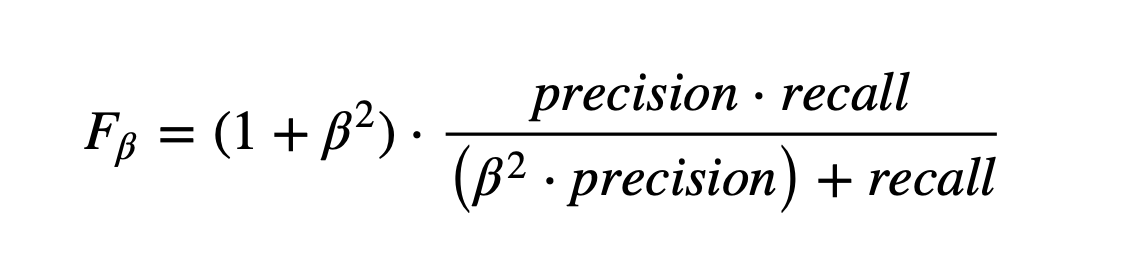

In [35]:
Image(filename='fbeta.png', width=400)

* Accuracy: 예측이 정답과 얼마나 정확한가?

* Precision: 예측한 것 중에서 정답의 비율. False Positives를 줄이는 것을 목표로 함.

[True Positives/(True Positives + False Positives)]

* Recall: 찾아야 할 것중에서 실제로 찾은 비율. Positive 데이타 수에서 Positive로 분류된 수. False Negatives는 피하는 것이 목표

Ex) 원본 데이타에 암 양성이 100개 있었는데, 모델에 있어서 90개가 분류되었으면, Sensitive Rate = 0.9



[True Positives/(True Positives + False Negatives)]

### 3-2. Naive Predictor Performace

아래의 코드는 머신러닝 알고리즘을 적용하기 전에  F-Score를 확인하기 위해 Confusion matrix를 이용한 것입니다. 

In [37]:
'''
TP = np.sum(income) # 양성인데 양성으로 제대로 검출된 것
FP = income.count() - TP # 음성인데 양성으로 잘못 검출된것
TN = 0 # 음성인데 음성으로 제대로 검출된 것
FN = 0 # 양성인데 음성으로 잘못 검출된 것
'''
TP = np.sum(income)
FP = n_records
TN = 0
FN = 0

accuracy = TP / FP 
print ('Accuracy : {:.3}'.format(accuracy))
recall = TP / (TP + FN)
print ('Recall : {:.3}'.format(recall))
precision = TP / (TP + FP)
print ('Precision : {:.3}'.format(precision))
print()

fscore = (1 + 0.5**2) * (precision * recall) / (0.5**2 * precision + recall) 

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Accuracy : 0.248
Recall : 1.0
Precision : 0.199

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2365]


결과를 살펴보면 Recall 점수가 상대적으로 높은 것을 알 수 있습니다. 하지만 Accuracy와 Precision, Recall 중에서 어느 하나가 높다고 해서 분류를 제대로 하였다고 해석할 수 없습니다. 받대로 F-Score가 높으면 분류가 제대로 되었다고 할 수 있으므로 F-Score 를 적절하게 도출될 수 있도록 하는 것이 좋습니다. 출력된 F-Score 점수는 0에 가까으므로 분류 알고리즘을 적용하여 개선해야할 여지가 많다는 것을 알 수 있습니다.

## 4. Spot Check ML Algorithms

scikit-learn 에서는 supervised learning 모델들을 아래와 같이 이용할 수 있습니다.

* Gaussian Naive Bayes (GaussianNB)

* Decision Trees

* Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)

* K-Nearest Neighbors (KNeighbors)

* Stochastic Gradient Descent Classifier (SGDC)

* Support Vector Machines (SVM)

* Logistic Regression

이들 알고리즘들 중에서 Logistic Regression 와 Linear Discriminant Analysis 메소드는 문제가 선형일 경우에 적용할 수 있으며, 􏰀 k-Nearest Neighbors, Naive Bayes. SVM 등은 비선형일 때 적용할 수 있습니다. 그리고 이들 알고리즘을 이용하여 알고리즘 성능을 체크합니다.

### 4-1. Logistic Regression

로지스틱(Logistic) 회귀분석은 그 명칭과 달리 회귀분석 문제와 분류 문제 모두에 사용할 수 있습니다. 분석하고자 하는 데이터의 종속변수는 이항변수로 연속변수를 분석하는데 적합한 기본적인 회귀분석을 할 수 없으므로 로지스틱 분석 방법을 첫 번째로 사용합니다.

In [50]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.linear_model import LogisticRegression

# Training the model
start = time()
model = LogisticRegression(solver='liblinear', random_state=5)
model.fit(X_train, y_train)
end =time()
traintime = end - start

# Testing the model
start = time()
predictions_test = model.predict(X_test)
end=time()
prediction_time = end - start

# Compute accuracy of testing data
acc_test = accuracy_score(y_test, predictions_test)

# Compute accuracy of testing data
# To give more weight to the Precision, we pick a Beta value in the interval 0 < Beta < 1
# To give more weight to the Recall, we pick a Beta Value in the interval 1 < Beta < +∞

f_test = fbeta_score(y_test, predictions_test, beta=0.5)

print("Training time is {:.2f} and Testing time is {:.2f}.".format(traintime, prediction_time))
print("Accuracy Score of testing data: {:.3f}".format(acc_test))
print("F-Score of testing data: {:.3f}".format(f_test))

Training time is 0.26 and Testing time is 0.02.
Accuracy Score of testing data: 0.842
F-Score of testing data: 0.683


### 4-2. k-Nearest Neighbors

In [54]:
from sklearn.neighbors import KNeighborsClassifier

start = time()
K_model = KNeighborsClassifier()
K_model.fit(X_train, y_train)
end =time()
traintime = end - start

# Testing the model
start = time()
predictions_test = K_model.predict(X_test)
end=time()
prediction_time = end - start

# Compute accuracy of testing data
acc_test = accuracy_score(y_test, predictions_test)

# Compute accuracy of testing data
f_test = fbeta_score(y_test, predictions_test, beta=0.5)

print("Training time is {:.2f} and Testing time is {:.2f}.".format(traintime, prediction_time))
print("Accuracy Score of testing data: {:.3f}".format(acc_test))
print("F-Score of testing data: {:.3f}".format(f_test))

Training time is 0.87 and Testing time is 24.50.
Accuracy Score of testing data: 0.824
F-Score of testing data: 0.639


### 4-3. Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

start = time()
G_model = GaussianNB()
G_model.fit(X_train, y_train)
end =time()
traintime = end - start

# Testing the model
start = time()
predictions_test = G_model.predict(X_test)
end=time()
prediction_time = end - start

# Compute accuracy of testing data
acc_test = accuracy_score(y_test, predictions_test)

# Compute accuracy of testing data
f_test = fbeta_score(y_test, predictions_test, beta=0.5)

print("Training time is {:.2f} and Testing time is {:.2f}.".format(traintime, prediction_time))
print("Accuracy Score of testing data: {:.3f}".format(acc_test))
print("F-Score of testing data: {:.3f}".format(f_test))

Training time is 0.10 and Testing time is 0.02.
Accuracy Score of testing data: 0.598
F-Score of testing data: 0.421


### 4-4. Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

start = time()
d_model = DecisionTreeClassifier()
d_model.fit(X_train, y_train)
end =time()
traintime = end - start

# Testing the model
start = time()
predictions_test = d_model.predict(X_test)
end=time()
prediction_time = end - start

# Compute accuracy of testing data
acc_test = accuracy_score(y_test, predictions_test)

# Compute accuracy of testing data
f_test = fbeta_score(y_test, predictions_test, beta=0.5)

print("Training time is {:.2f} and Testing time is {:.2f}.".format(traintime, prediction_time))
print("Accuracy Score of testing data: {:.3f}".format(acc_test))
print("F-Score of testing data: {:.3f}".format(f_test))

Training time is 0.34 and Testing time is 0.01.
Accuracy Score of testing data: 0.816
F-Score of testing data: 0.623


### 4-5. SVM

In [58]:
from sklearn.svm import SVC

start = time()
s_model = SVC(random_state=5)
s_model.fit(X_train, y_train)
end =time()
traintime = end - start

# Testing the model
start = time()
predictions_test = s_model.predict(X_test)
end=time()
prediction_time = end - start

# Compute accuracy of testing data
acc_test = accuracy_score(y_test, predictions_test)

# Compute accuracy of testing data
f_test = fbeta_score(y_test, predictions_test, beta=0.5)

print("Training time is {:.2f} and Testing time is {:.2f}.".format(traintime, prediction_time))
print("Accuracy Score of testing data: {:.3f}".format(acc_test))
print("F-Score of testing data: {:.3f}".format(f_test))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training time is 97.13 and Testing time is 16.21.
Accuracy Score of testing data: 0.837
F-Score of testing data: 0.674


### 4-6. Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

start = time()
r_model = RandomForestClassifier(random_state=5)
r_model.fit(X_train, y_train)
end =time()
traintime = end - start

# Testing the model
start = time()
predictions_test = r_model.predict(X_test)
end=time()
prediction_time = end - start

# Compute accuracy of testing data
acc_test = accuracy_score(y_test, predictions_test)

# Compute accuracy of testing data
f_test = fbeta_score(y_test, predictions_test, beta=0.5)

print("Training time is {:.2f} and Testing time is {:.2f}.".format(traintime, prediction_time))
print("Accuracy Score of testing data: {:.3f}".format(acc_test))
print("F-Score of testing data: {:.3f}".format(f_test))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training time is 0.49 and Testing time is 0.02.
Accuracy Score of testing data: 0.838
F-Score of testing data: 0.673


### 4-7. Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

start = time()
g_model = GradientBoostingClassifier(random_state=5)
g_model.fit(X_train, y_train)
end =time()
traintime = end - start

# Testing the model
start = time()
predictions_test = g_model.predict(X_test)
end=time()
prediction_time = end - start

# Compute accuracy of testing data
acc_test = accuracy_score(y_test, predictions_test)

# Compute accuracy of testing data
f_test = fbeta_score(y_test, predictions_test, beta=0.5)

print("Training time is {:.2f} and Testing time is {:.2f}.".format(traintime, prediction_time))
print("Accuracy Score of testing data: {:.3f}".format(acc_test))
print("F-Score of testing data: {:.3f}".format(f_test))

Training time is 11.40 and Testing time is 0.03.
Accuracy Score of testing data: 0.863
F-Score of testing data: 0.740


## 5. Choice the Best Model

#### < Result of Spot check Algorithms >

<Figure size 720x576 with 0 Axes>

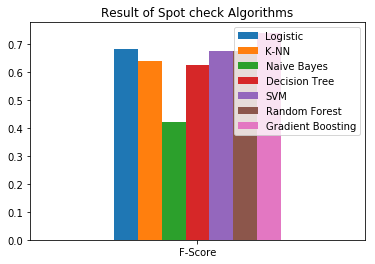

In [108]:
check_result = pd.DataFrame(
        [[0.02, 24.5, 0.02, 0.01, 16.21, 0.02, 0.03],
         [0.842, 0.842, 0.598, 0.816, 0.837, 0.838, 0.863],
         [0.683, 0.639, 0.421, 0.623, 0.674, 0.673, 0.740]],
    index =['Time', 'Accuracy', 'F-Score'],
    columns=['Logistic', 'K-NN', 'Naive Bayes', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting']
)

plt.figure(figsize=(10,8))
check_result[2:].plot.bar(rot=0)
plt.title('Result of Spot check Algorithms')
plt.show()

In [107]:
check_result

,Logistic,K-NN,Naive Bayes,Decision Tree,SVM,Random Forest,Gradient Boosting
Time,0.020,24.500,0.020,0.010,16.210,0.020,0.030
Accuracy,0.842,0.842,0.598,0.816,0.837,0.838,0.863
F-Score,0.683,0.639,0.421,0.623,0.674,0.673,0.740


결과를 테이블 형태로 만들어 확인해보면 Gradient Boosting 알고리즘이 0.74 으로 Testing data에서 가장 높은 F 점수를 획득하고, 실행 시간도 짧아서 시도한 알고리즘들 중에서 가장 만족하였습니다. Gradient Boosting 알고리즘은 회귀와 분류 분석에 이용되며 Ensemble 방법 중에서 Boosting을 이용합니다. Boosting 방법은 약한 분류기를 결합하여 강한 모델을 만듭니다. 이처럼 Gradient Boosting은 성능이 좋게 나오는 편이여서 파생되는 알고리즘들도 많습니다. 하지만 이 알고리즘들은 계산량이 상당히 필요하므로 효율적인 하드웨어가 필수입니다. 

## 6. Improve Model Performance

몇몇 알고리즘을 테스트 한 결과 Gradient Boosting 분류기를 선택하였습니다. 더 높은 성능을 위하여 선택한 모델을 Grid Search를 이용하여 세부적인 조정을 합니다. Grid Search로 적어도 3개의 하이퍼 파라미터를 조정합니다. 

#### < Grid Search >

그리드 서치는 모델이 Overfitting에 빠지지 않도록 하기위해서 Hyperparameter에 대한 최적합 작업을 수행합니다. Hyperparameter는 머시러닝 모델의 설계에 필요한 파라미터를 말합니다. 파라미터는 머신러닝 모델 동작을 결정하는 인자들로 성능에 영향을 미치고, 이러한 파라미터들을 Hyperparameter 라고 합니다. 

Hyperparameter를 정하는 것은 까다로운 작업입니다. 왜냐하면, 파라미터가 1개 추가될때마다 검증의 복잡도가 기하급수적으로 증가하기 때문입니다. 그래서 Hyperparameter의 범위나 Hyperparameter 끼리의 상관관계등을 고려해야 합니다.

이처럼 까다로운 Hyperparameter를 최적화 시키기 위한 방법 중 하나가 그리드 서치 방법입니다. 그리드 서치는 Hyperparameter space를 grid 형태로 분할한뒤 각 grid point 에대하여 평가 에러를 계산하고 전체 grid point 중에서 가장 낮은 에러를 나타내는 Hyperparameter를 선택하는 방법입니다. 

그리드 서치를 이용할 경우 적절한 범위와 간격을 설정한다면 가장 좋은 Hyperparameter를 찾을 수 있지만, 모델을 학습하는데 시간이 상당해지는 문제가 발생합니다. 특히, Hyperparameter의 개수가 많아질수록 시도해야할 grid point 수는 기하급수적으로 늘어나 아주 좋은 Hyperparameter를 찾는것은 불가능합니다.

이를 해결하기 위하여 Random search, Metaheuristic, Sequential model_based 최적화 방법들이 제안되었습니다. 그리고 그리드 서치의 결과를 판정하기 위해서는 validation set이 필요하기도 합니다.

아래는 파라미터 조정을 위한 Grid Search 실행 순서입니다.

1. sklearn.grid_search.GridSearchCV 와 sklearn.metrics.make_scorer 를 import.


2. Gradient Boosting 모델을 초기화 시키고 clf 변수에 저장.


3. 모델에서 조절하고자 하는 파라미터를 dict 타입의 변수에 저장.
(만약 모델이 max_features 파라미터를 가지고 있다면 max_features 는 조정하는 것을 피하세요.)


4. F-Score 점수를 저장할 수 있도록 make_score 함수를 사용. ( β=0.5 )


5. 모델에 적용한 그리드 서치를 실행하고 grid_obj 변수에 저장.


6. Training 데이터에 그리드 서치 개체를 Fit 하고 grid_fit 변수에 저장.

GridSearchCV  fit 메서드를 호출하면 grid search를 사용하여 자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾아줍니다. 생성된 하이퍼파라미터와 실행 결과는 아래의 속성들에 저장됩니다..

* grid_scores_ :
param_grid 의 모든 파리미터 조합에 대한 성능 결과.
parameters: 사용된 파라미터
mean_validation_score: 교차 검증(cross-validation) 결과의 평균값
cv_validation_scores: 모든 교차 검증(cross-validation) 결과


* best_score_:최고 점수
 

* best_params_: 최고 점수를 낸 파라미터


* best_estimator_: 최고 점수를 낸 파라미터를 가진 모형

< scikit learn 에서 제공하는 파라미터 조정 함수
: validation_curve, GridSearchCV, ParameterGrid, Random Search >

In [109]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=10)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'learning_rate': [0.1, 0.5, 1],
              'n_estimators' : [100, 200, 300],
               'max_depth' : [1,3,5]    
             }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8683
Final F-score on the testing data: 0.7465


그리드 서치를 이용한 Hyperparameter 튜닝을 결과 0.7465 으로 미세하지만 성능이 향상된것을 확인할 수 있습니다.

## 7. Feature Importance

In [135]:
#import matplotlib.patches as mpatches

# Using .feature_importances_ 
importances = g_model.feature_importances_

#  Extract the five most important features
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:5]]
values = importances[indices][:5]

#  Display importances
importance_result = pd.DataFrame(
        [values]
    , columns=columns
)

importance_result

,marital-status_ Married-civ-spouse,capital-gain,education-num,capital-loss,age
0,0.393986,0.200038,0.199096,0.062722,0.054298


## Conclusion

Census 데이터세트에는 총 13개의 독립변수가 있습니다. 이들 변수중에서 연 소득의 영향을 미치는 요인을 추출하니 위와 같은 결과가 나왔습니다. 예상을 하였듯이 나이와 소득 상태와 교육 수준이 많은 영향을 미친다는 것을 알 수 있습니다. 특히나 인상적인 것은 배우자가 있음이 소득의 증가와 연관이 있다는 결과입니다. 아마도 가정이 안정적이면 소득 수준 상태 또한 안정적이라는 것을 알 수 있습니다.

기부자를 찾는 마케팅 업체같은 경우에는 이러한 분석된 데이터를 바탕으로 중요한 요인에 더 집중하여 홍보 마케팅을 한다면, 기부하는 사람들의 비율을 높일 수 있을 것으로 예상합니다. 

이상으로 연 소득이 $50,000 사람을 찾아서 기부를 할 가능성이 높은 사람들을 찾아 분류하는 감독학습을 실행하였습니다. 이처럼 기업이나 다른 조직들은 예측분석을 통하여 사업이 이루고자 하는 목표를 더 과학적으로 접근하고 예측할 수 있습니다. 이러한 예측분석은 앞으로도 더 활발하게 이용될 것으로 예상이 되며, 더 발전된 형태의 모델들의 개발로 비즈니스를 성공적으로 이끌것 입니다.